In [1]:
import numpy as np
import pandas as pd
import statistics as st

In [2]:
df = pd.read_csv("DS1_C4_S7_Car_Data_Challenge.csv")
df

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1271,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


Task 1
Load the data into a data frame and retain only the following columns.
Drop the rows with missing values only in the following columns:
Cylinders
Kerb_Weight
Make
Displacement
Fuel_Tank_Capacity_litre
City_Mileage_km_litre
Highway_Mileage_km_litre
Power
 Torque
Hint: df dropna(subset=['Power', 'Torque'],inplace = True)

In [3]:
df.isnull().sum()

S. No.                 0
Make                  75
Model                  0
Variant                0
Displacement          12
                    ... 
USB_Ports           1246
Heads-Up_Display    1224
Welcome_Lights      1206
Battery             1262
Electric_Range      1258
Length: 137, dtype: int64

In [4]:
columns_to_keep = ['Cylinders', 'Kerb_Weight', 'Make', 'Displacement', 
                   'Fuel_Tank_Capacity_litre', 'City_Mileage_km_litre', 
                   'Highway_Mileage_km_litre', 'Power', 'Torque']

df1 = df.drop(columns = df.columns.difference(columns_to_keep))
df1





,Make,Displacement,Cylinders,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Kerb_Weight,Power,Torque
0,Tata,624.0,2.0,24.0,23.60,NaN,660 kg,38PS@5500rpm,51Nm@4000rpm
1,Tata,624.0,2.0,24.0,23.60,NaN,725 kg,38PS@5500rpm,51Nm@4000rpm
2,Tata,624.0,2.0,15.0,NaN,NaN,710 kg,38PS@5500rpm,51Nm@4000rpm
3,Tata,624.0,2.0,24.0,23.60,NaN,725 kg,38PS@5500rpm,51Nm@4000rpm
4,Tata,624.0,2.0,24.0,23.60,NaN,725 kg,38PS@5500rpm,51Nm@4000rpm
...,...,...,...,...,...,...,...,...,...
1270,Honda,1498.0,4.0,40.0,22.60,25.10,1170 kg,100PS@3600rpm,200Nm@1750rpm
1271,Honda,1498.0,4.0,40.0,22.60,25.10,1175 kg,100PS@3600rpm,200Nm@1750rpm
1272,Honda,1497.0,4.0,40.0,18.00,18.00,1107 kg,119PS@6600rpm,145Nm@4600rpm
1273,Honda,1497.0,4.0,40.0,14.30,16.40,1080 kg,119PS@6600rpm,145Nm@4600rpm


In [5]:
df1.isnull().sum()

Make                         75
Displacement                 12
Cylinders                    66
Fuel_Tank_Capacity_litre     69
City_Mileage_km_litre       555
Highway_Mileage_km_litre    799
Kerb_Weight                 365
Power                         0
Torque                        2
dtype: int64

In [6]:
df1 = df1.dropna(subset = columns_to_keep)
df1

,Make,Displacement,Cylinders,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Kerb_Weight,Power,Torque
24,Maruti Suzuki,1196.0,4.0,40.0,12.00,15.00,920 kg,73PS@6000rpm,101Nm@3000rpm
25,Maruti Suzuki,1196.0,4.0,40.0,12.00,15.00,940 kg,74PS@6000RPM,101Nm@3000rpm
26,Maruti Suzuki,1196.0,4.0,40.0,11.00,15.00,928 kg,73PS@6000rpm,101Nm@3000rpm
29,Maruti Suzuki,998.0,3.0,35.0,14.00,17.00,745 kg,68PS@6000rpm,90Nm@3500rpm
30,Maruti Suzuki,998.0,3.0,35.0,14.00,17.00,750 kg,68PS@6200rpm,90Nm@3500rpm
...,...,...,...,...,...,...,...,...,...
1270,Honda,1498.0,4.0,40.0,22.60,25.10,1170 kg,100PS@3600rpm,200Nm@1750rpm
1271,Honda,1498.0,4.0,40.0,22.60,25.10,1175 kg,100PS@3600rpm,200Nm@1750rpm
1272,Honda,1497.0,4.0,40.0,18.00,18.00,1107 kg,119PS@6600rpm,145Nm@4600rpm
1273,Honda,1497.0,4.0,40.0,14.30,16.40,1080 kg,119PS@6600rpm,145Nm@4600rpm


Task 2
Preprocess the data in the following columns as specified.
Kerb_ weight: Remove the "kg" and ensure the column is numerical Convert the weight in kilograms to pounds, by multiplying each value in the column with the number 2.2.
Power: Sample data = 38PS @ 5500rpm
All entries of the column "Power" should only contain the number 38 after cleaning.

Torque: Sample data = 51Nm@4000rpm
The column "Torque" must only contain the number 51 after cleaning. Perform this operation to all entries of the column and ensure this column is converted to numerical type.   
    
    

In [7]:
df1["Kerb_Weight"] = df1["Kerb_Weight"].str.replace("kg"," ")


C:\Users\rasto\AppData\Local\Temp\ipykernel_9196\3358189863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Kerb_Weight"] = df1["Kerb_Weight"].str.replace("kg"," ")


In [8]:
#code for cleaning the power column
print("Befre cleaning")
df1.head()

#Regular expression used for cleaning the power column
df1["Power"] = df1["Power"].str.strip()
df1['Power'] = df1['Power'].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*",'', regex=True) 





Befre cleaning


C:\Users\rasto\AppData\Local\Temp\ipykernel_9196\3798199279.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Power"] = df1["Power"].str.strip()
C:\Users\rasto\AppData\Local\Temp\ipykernel_9196\3798199279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Power'] = df1['Power'].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*",'', regex=True)


In [9]:
df1["Torque"] = df1["Torque"].str.strip() # stripping white spaces if any 
df1['Torque'] = df1['Torque'].str.replace(r"-",'', regex=True) # Removing any occurances of "-" in this the column
df1['Torque'] = df1['Torque'].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*",'', regex=True) 

C:\Users\rasto\AppData\Local\Temp\ipykernel_9196\1850645422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Torque"] = df1["Torque"].str.strip() # stripping white spaces if any
C:\Users\rasto\AppData\Local\Temp\ipykernel_9196\1850645422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Torque'] = df1['Torque'].str.replace(r"-",'', regex=True) # Removing any occurances of "-" in this the column
C:\Users\rasto\AppData\Local\Temp\ipykernel_9196\1850645422.py:3: SettingWithCopyWarning: 
A value 

In [10]:
df1 = df1.astype({"Kerb_Weight":float})
df1 = df1.astype({"Power":float})
df1 = df1.astype({"Torque":float})

Task 3
For each column listed in Task 1, calculate and display the mean, median, standard deviation, and coefficient of variation for each manufacturer.
For the "Displacement" column, display the distribution for each manufacturer using box plots.

In [11]:
data = []
for i in df1.columns[1:]:
    car_series = pd.Series(df1[i])
    
    mean = car_series.mean()
    median = car_series.median()
    mode = car_series.mode()
    std = st.stdev(car_series)
    cov = std*100/mean
    
    if (i == "Displacement"):
        data.append(["Displacement", mean, median, mode, std, cov])
    elif (i == "Cylinders"):
        data.append(["Cylinders", mean, median, mode, std, cov])
    elif (i== "Fuel_Tank_Capacity_litre"):
        data.append(["Fuel_Tank_Capacity_litre", mean, median, mode, std, cov])
    elif (i== "City_Mileage_km_litre"):
        data.append(["City_Mileage_km_litre", mean, median, mode , std, cov])
    elif (i== "Highway_Mileage_km_litre"):
        data.append(["Highway_Mileage_km_litre", mean, median, mode, std, cov])
    elif (i== "Kerb_Weight"):
        data.append(["Kerb_Weight", mean, median, mode, std, cov])
    elif (i  == "Power"):
        data.append(["Power", mean, median, mode, std, cov])
    elif (i== "Torque"):
        data.append(["Torque", mean, median, mode, std, cov])

col_names = ["Feature","Mean", "median","mode" ,"standard deviation", "coefficient of variation"]
d_df2= pd.DataFrame(data, columns = col_names)
d_df2

,Feature,Mean,median,mode,standard deviation,coefficient of variation
0,Displacement,1878.427215,1497.00,"0 1197.0 Name: Displacement, dtype: float64",1080.745717,57.534607
1,Cylinders,4.382911,4.00,"0 4.0 Name: Cylinders, dtype: float64",1.604228,36.601887
2,Fuel_Tank_Capacity_litre,53.393987,48.00,"0 45.0 Name: Fuel_Tank_Capacity_litre, dtyp...",15.725846,29.452465
3,City_Mileage_km_litre,14.354462,14.00,"0 12.0 Name: City_Mileage_km_litre, dtype: ...",5.366518,37.385716
4,Highway_Mileage_km_litre,17.133639,17.71,0 22.0 1 23.0 Name: Highway_Mileage_km_l...,4.921881,28.726420
5,Kerb_Weight,1365.240506,1210.00,"0 810.0 1 895.0 Name: Kerb_Weight, dtype...",455.204554,33.342444
6,Power,152.697785,100.00,"0 68.0 Name: Power, dtype: float64",139.867859,91.597831
7,Torque,258.208228,200.00,"0 200.0 Name: Torque, dtype: float64",178.567225,69.156288


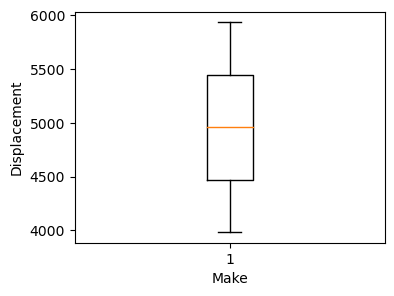

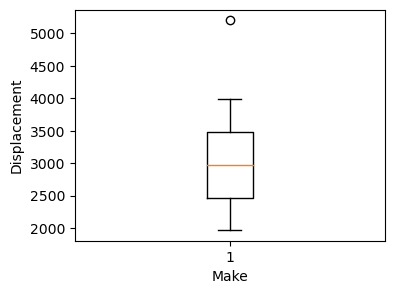

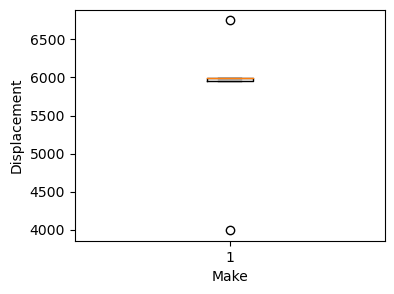

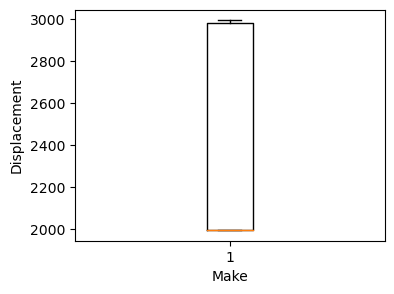

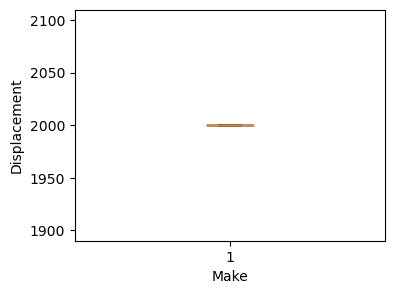

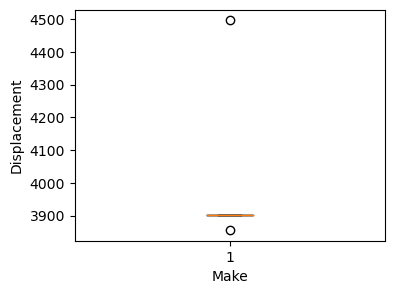

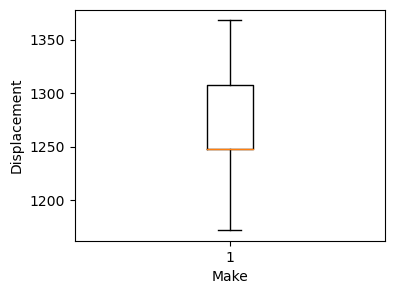

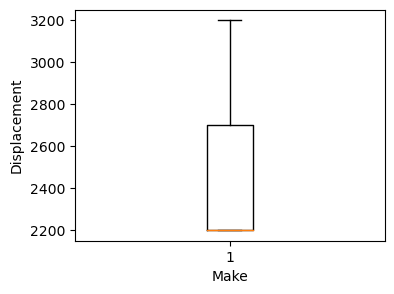

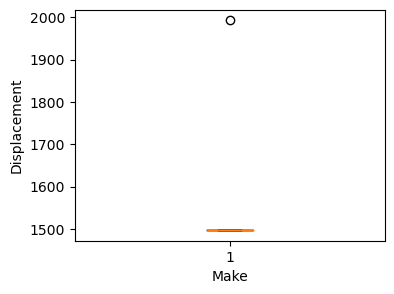

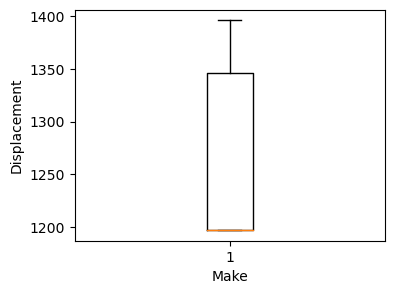

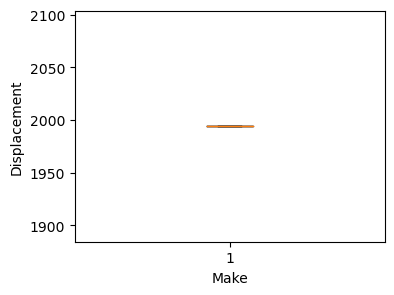

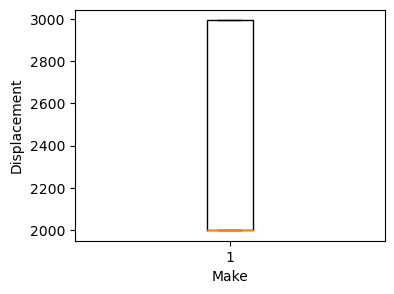

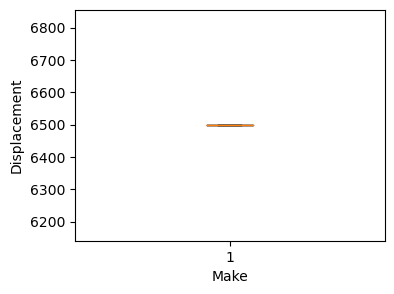

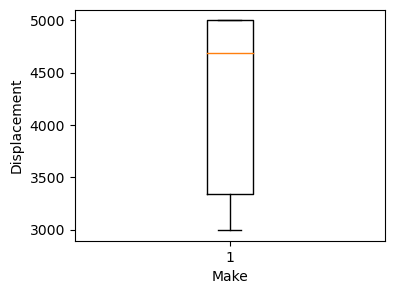

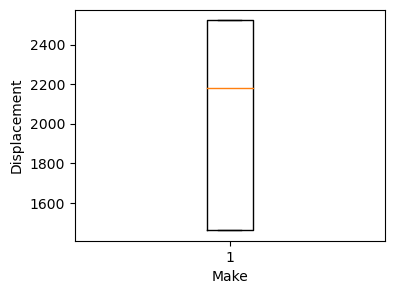

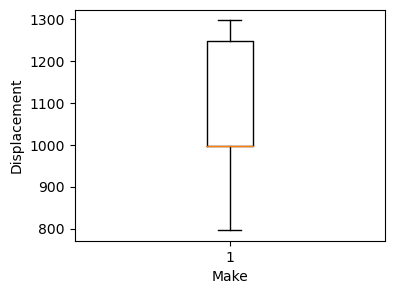

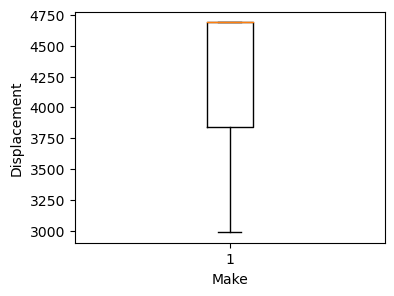

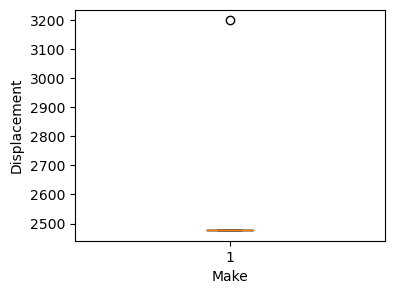

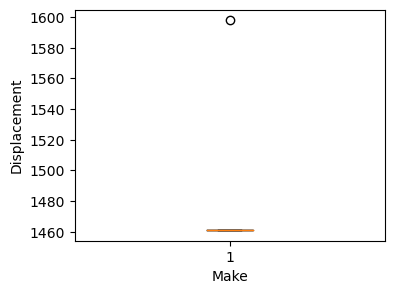

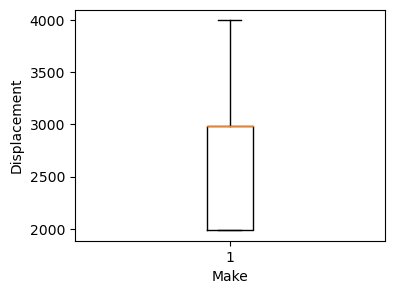

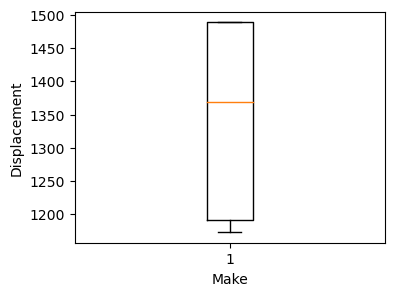

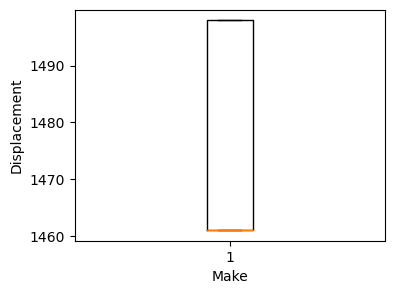

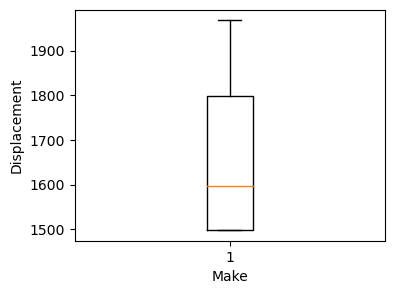

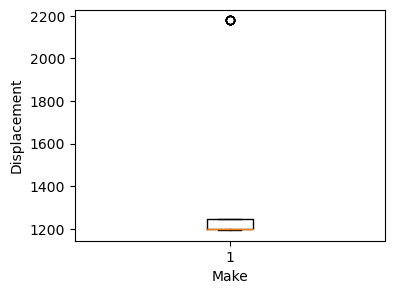

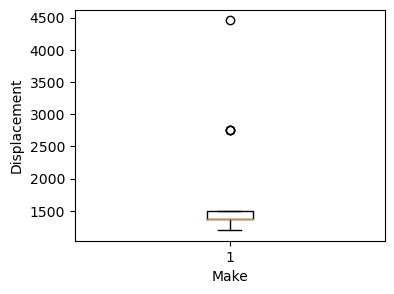

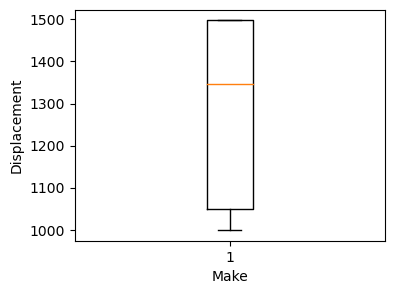

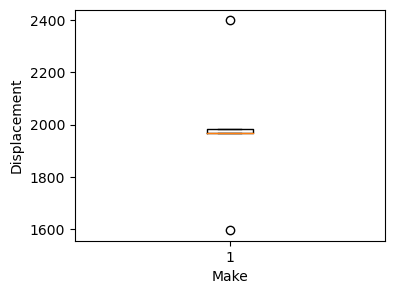

In [14]:
group = df1.groupby(by=["Make"])

for make, i in group:
    plt.figure(figsize = (4,3))
    plt.boxplot(i["Displacement"])
    plt.xlabel("Make")
    plt.ylabel("Displacement")
    plt.show()

<Axes: title={'center': 'Displacement'}, xlabel='Make'>

<Figure size 1600x1600 with 0 Axes>

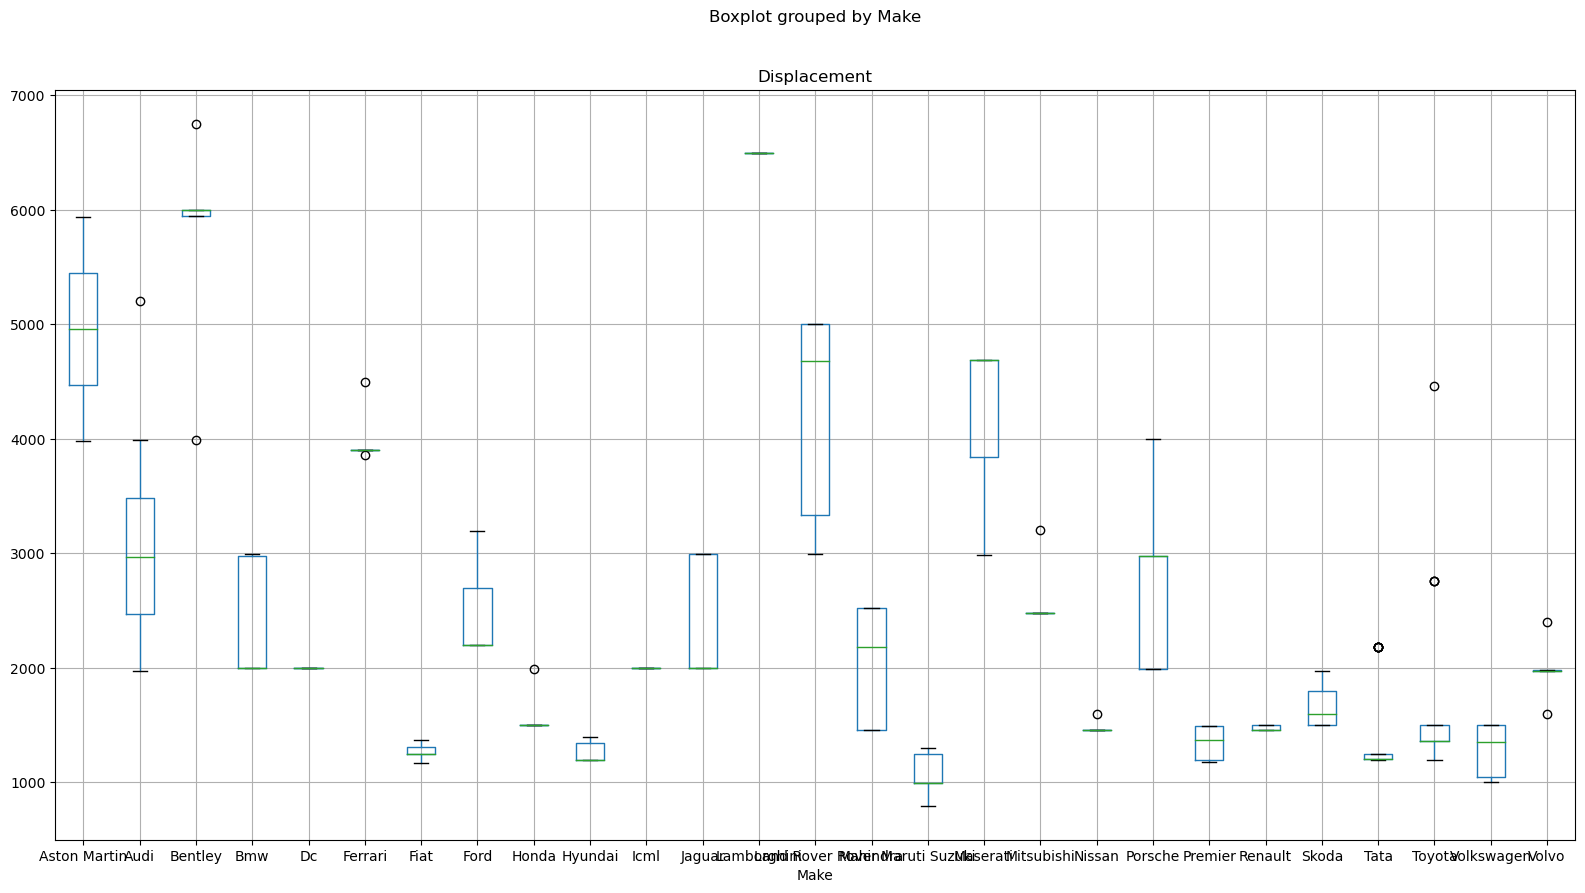

In [50]:
plt.figure(figsize=(16, 16))
df1.boxplot(column='Displacement', by='Make', figsize=(19,10))

Task 4
Identify at least three features that affect the mileages (using correlation analysis) of the cars of the following manufactures and represent them visually using appropriate types of charts/graphs in Python:
Renault
Toyota Honda
Illustrate with justification if these factors affect the mileage of a car positively or negatively.

In [15]:
df1

,Make,Displacement,Cylinders,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Kerb_Weight,Power,Torque
24,Maruti Suzuki,1196.0,4.0,40.0,12.00,15.00,920.0,73.0,101.0
25,Maruti Suzuki,1196.0,4.0,40.0,12.00,15.00,940.0,74.0,101.0
26,Maruti Suzuki,1196.0,4.0,40.0,11.00,15.00,928.0,73.0,101.0
29,Maruti Suzuki,998.0,3.0,35.0,14.00,17.00,745.0,68.0,90.0
30,Maruti Suzuki,998.0,3.0,35.0,14.00,17.00,750.0,68.0,90.0
...,...,...,...,...,...,...,...,...,...
1270,Honda,1498.0,4.0,40.0,22.60,25.10,1170.0,100.0,200.0
1271,Honda,1498.0,4.0,40.0,22.60,25.10,1175.0,100.0,200.0
1272,Honda,1497.0,4.0,40.0,18.00,18.00,1107.0,119.0,145.0
1273,Honda,1497.0,4.0,40.0,14.30,16.40,1080.0,119.0,145.0


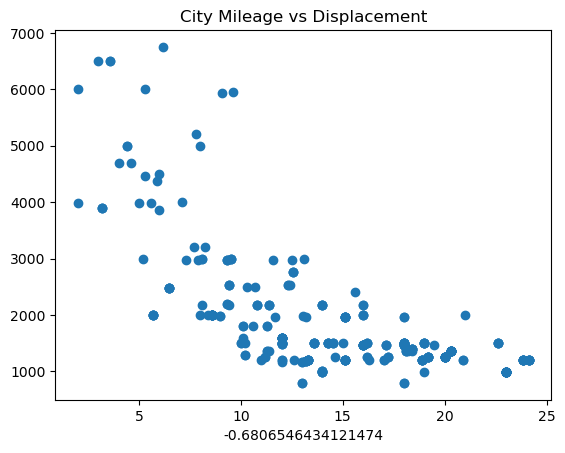

In [21]:
plt.scatter(df1["City_Mileage_km_litre"], df1["Displacement"])
plt.xlabel(str(df1["City_Mileage_km_litre"].corr(df1["Displacement"])))
plt.title("City Mileage vs Displacement")
plt.show()


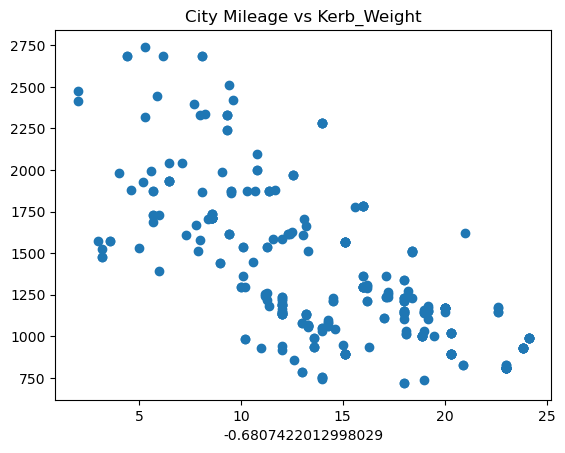

In [22]:
plt.scatter(df1["City_Mileage_km_litre"], df1["Kerb_Weight"])
plt.xlabel(str(df1["City_Mileage_km_litre"].corr(df1["Kerb_Weight"])))
plt.title("City Mileage vs Kerb_Weight")
plt.show()

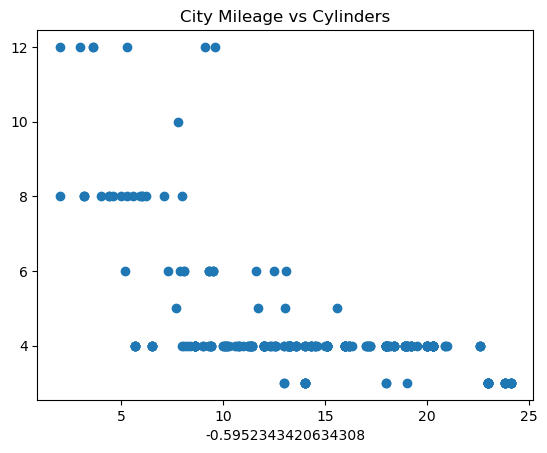

In [23]:
plt.scatter(df1["City_Mileage_km_litre"], df1["Cylinders"])
plt.xlabel(str(df1["City_Mileage_km_litre"].corr(df1["Cylinders"])))
plt.title("City Mileage vs Cylinders")
plt.show()

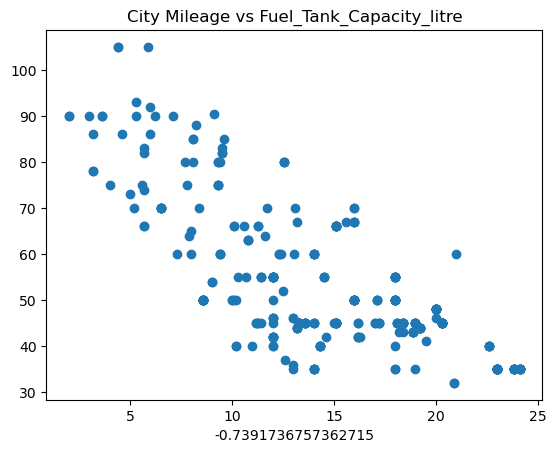

In [24]:
plt.scatter(df1["City_Mileage_km_litre"], df1["Fuel_Tank_Capacity_litre"])
plt.xlabel(str(df1["City_Mileage_km_litre"].corr(df1["Fuel_Tank_Capacity_litre"])))
plt.title("City Mileage vs Fuel_Tank_Capacity_litre")
plt.show()

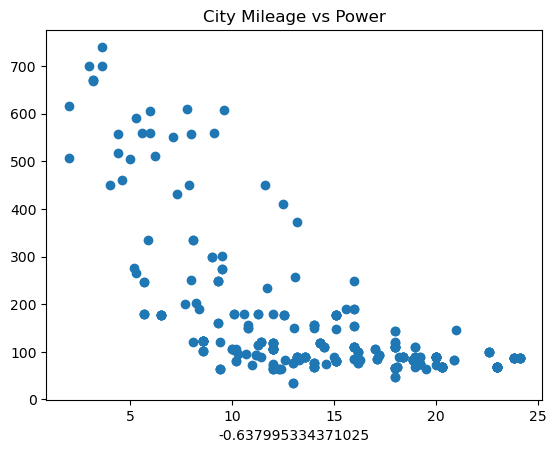

In [25]:
plt.scatter(df1["City_Mileage_km_litre"], df1["Power"])
plt.xlabel(str(df1["City_Mileage_km_litre"].corr(df1["Power"])))
plt.title("City Mileage vs Power")
plt.show()

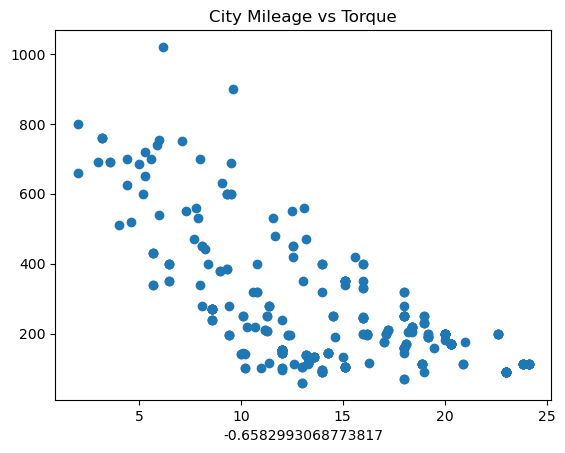

In [26]:
plt.scatter(df1["City_Mileage_km_litre"], df1["Torque"])
plt.xlabel(str(df1["City_Mileage_km_litre"].corr(df1["Torque"])))
plt.title("City Mileage vs Torque")
plt.show()

In [ ]:
#all the correlation values are in negative so that tells us that the all the features mentioned above effects the mileage negatively 